In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train   # its a 2D array Convert to one D

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)

In [ ]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
def plot_smple(x,y,index):
  plt.imshow(x[index])
  plt.xlabel(classes[index])

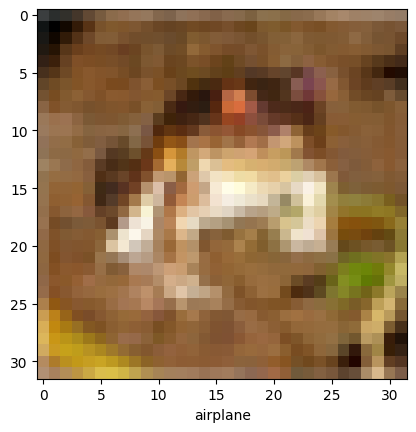

In [ ]:
plot_smple(x_train,y_train,0)

In [ ]:
#standardize the dataset
x_train=x_train/255
x_test=x_test/255

In [ ]:
#ANN

In [ ]:
model=models.Sequential([
  layers.Flatten(input_shape=(32,32,3)),
  layers.Dense(3000,activation='relu'),
  layers.Dense(1000,activation='relu'),
  layers.Dense(10,activation='softmax')
])
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 12s 4ms/step - loss: 1.8095 - accuracy: 0.3553
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6219 - accuracy: 0.4263
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5400 - accuracy: 0.4565
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4807 - accuracy: 0.4786
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4289 - accuracy: 0.4981


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4853 - accuracy: 0.4679


[1.4853100776672363, 0.46790000796318054]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
predict=model.predict(x_test)
y_predicted_classes=[np.argmax(i) for i in predict]
print(classification_report(y_test,y_predicted_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.60      0.42      0.50      1000
           1       0.43      0.80      0.56      1000
           2       0.42      0.25      0.31      1000
           3       0.38      0.27      0.32      1000
           4       0.38      0.53      0.44      1000
           5       0.41      0.35      0.38      1000
           6       0.54      0.53      0.53      1000
           7       0.71      0.39      0.50      1000
           8       0.46      0.77      0.57      1000
           9       0.54      0.37      0.44      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



In [ ]:
#CNN

In [ ]:
cnn=models.Sequential([
  # cnn_layers
  # CONV => RELU => CONV => RELU => POOL => DROPOUT

  layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),padding='same',activation='relu'),
  BatchNormalization(),
  layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
  BatchNormalization(),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.25),

  # CONV => RELU => CONV => RELU => POOL => DROPOUT
  layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
  BatchNormalization(),
  layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
  BatchNormalization(),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.25),

  # CONV => RELU => CONV => RELU => POOL => DROPOUT
  layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),
  BatchNormalization(),
  layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
  BatchNormalization(),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.25),

  # dense neural network
  # FLATTEN => DENSE => RELU => Dropout => Output

  layers.Flatten(),
  layers.Dense(256,activation='relu'),                                  # hidden layer_1
  layers.Dense(512,activation='relu'),                                  # hidden layer_2
  layers.Dense(1024,activation='relu'),                                 # hidden layer_3
  layers.Dropout(0.5),
  layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,epochs=30)

Epoch 1/30
1563/1563 [==============================] - 29s 10ms/step - loss: 1.4175 - accuracy: 0.4920
Epoch 2/30
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0203 - accuracy: 0.6495
Epoch 3/30
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8713 - accuracy: 0.7027
Epoch 4/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7804 - accuracy: 0.7370
Epoch 5/30
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7173 - accuracy: 0.7573
Epoch 6/30
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6676 - accuracy: 0.7727
Epoch 7/30
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6295 - accuracy: 0.7886
Epoch 8/30
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5976 - accuracy: 0.7998
Epoch 9/30
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5699 - accuracy: 0.8097
Epoch 10/30
1563/1563 [==============================] - 15s 10ms/ste

In [ ]:
cnn.evaluate(x_test,y_test)   # here we are getting accuracy on test set is 82% and training 90% so overfitting

313/313 [==============================] - 2s 4ms/step - loss: 0.5907 - accuracy: 0.8220


[0.5907013416290283, 0.8220000267028809]

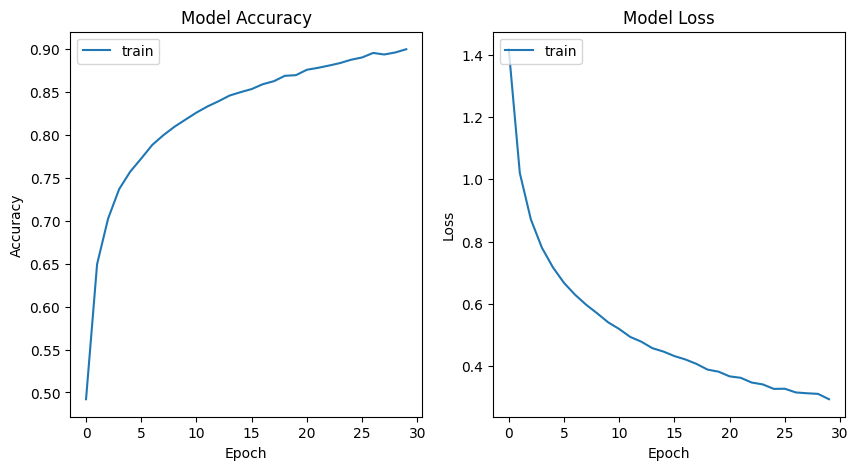

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(10,5))
    # summarize history for accuracy
    axs[0].plot(hist.history['accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train'], loc='upper left')
    # summarize history for loss
    axs[1].plot(hist.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train'], loc='upper left')
    plt.show()

plotmodelhistory(hist)

In [ ]:
# By using data augmentation

In [ ]:
batch_size=32   # means 32 images in one batch i.e defalut batch size
data_generator=tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator=data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch=x_train.shape[0]//batch_size    # no of batches
r=cnn.fit_generator(train_generator,validation_data=(x_test,y_test),steps_per_epoch=steps_per_epoch,epochs=30)

Epoch 1/30
   4/1562 [..............................] - ETA: 34s - loss: 0.3254 - accuracy: 0.8672 

<ipython-input-24-cc3a3731220c>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=cnn.fit_generator(train_generator,validation_data=(x_test,y_test),steps_per_epoch=steps_per_epoch,epochs=30)


1562/1562 [==============================] - 58s 37ms/step - loss: 0.4367 - accuracy: 0.8533 - val_loss: 0.4216 - val_accuracy: 0.8613
Epoch 2/30
1562/1562 [==============================] - 40s 26ms/step - loss: 0.4343 - accuracy: 0.8556 - val_loss: 0.4592 - val_accuracy: 0.8487
Epoch 3/30
1562/1562 [==============================] - 46s 29ms/step - loss: 0.4372 - accuracy: 0.8531 - val_loss: 0.4860 - val_accuracy: 0.8478
Epoch 4/30
1562/1562 [==============================] - 41s 26ms/step - loss: 0.4336 - accuracy: 0.8546 - val_loss: 0.4109 - val_accuracy: 0.8632
Epoch 5/30
1562/1562 [==============================] - 41s 26ms/step - loss: 0.4331 - accuracy: 0.8556 - val_loss: 0.4020 - val_accuracy: 0.8670
Epoch 6/30
1562/1562 [==============================] - 43s 27ms/step - loss: 0.4271 - accuracy: 0.8558 - val_loss: 0.4335 - val_accuracy: 0.8559
Epoch 7/30
1562/1562 [==============================] - 41s 26ms/step - loss: 0.4300 - accuracy: 0.8569 - val_loss: 0.4143 - val_accura

In [ ]:
#plots on model accuracy and model loss

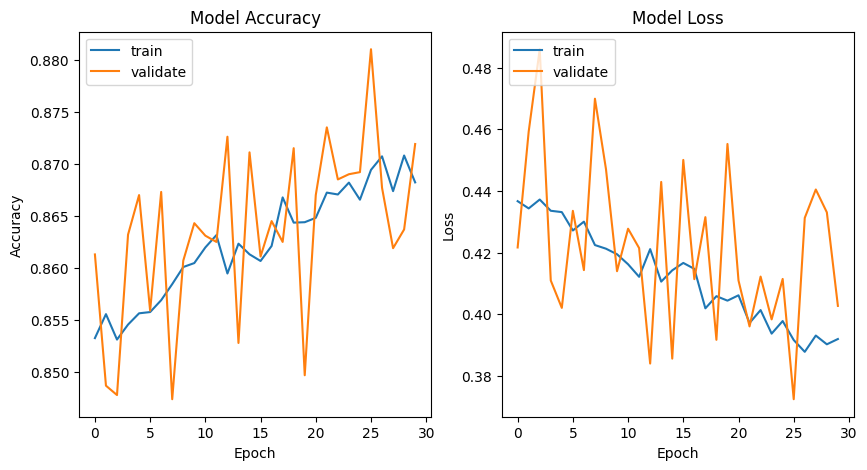

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(10,5))
    # summarize history for accuracy
    axs[0].plot(r.history['accuracy'])
    axs[0].plot(r.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(r.history['loss'])
    axs[1].plot(r.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

plotmodelhistory(r)

In [ ]:
cnn.evaluate(x_test,y_test)   # after data augmentation we get the accuracy of 87% on test set and on training 85% so no overfitting

313/313 [==============================] - 1s 4ms/step - loss: 0.4027 - accuracy: 0.8719


[0.4026821553707123, 0.8719000220298767]

In [ ]:
# confusion matrix

In [ ]:
predict=cnn.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_predicted_labels=[np.argmax(i) for i in predict]

In [ ]:
cf=tf.math.confusion_matrix(y_test,y_predicted_labels)
cf

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[932,  12,  10,   4,   3,   0,   6,   5,  15,  13],
       [  6, 961,   0,   1,   1,   0,   2,   0,   2,  27],
       [ 58,   1, 804,   9,  29,  30,  53,   6,   2,   8],
       [ 23,   5,  43, 626,  41, 119,  88,  23,   7,  25],
       [ 11,   2,  29,  11, 888,   8,  39,  11,   0,   1],
       [ 11,   4,  20,  41,  35, 824,  35,  18,   2,  10],
       [  6,   1,  12,  11,   5,   4, 958,   1,   1,   1],
       [  8,   0,   7,   6,  29,  20,   4, 919,   1,   6],
       [ 68,  33,   3,   2,   0,   0,   4,   2, 869,  19],
       [ 13,  38,   2,   1,   0,   0,   4,   1,   3, 938]], dtype=int32)>

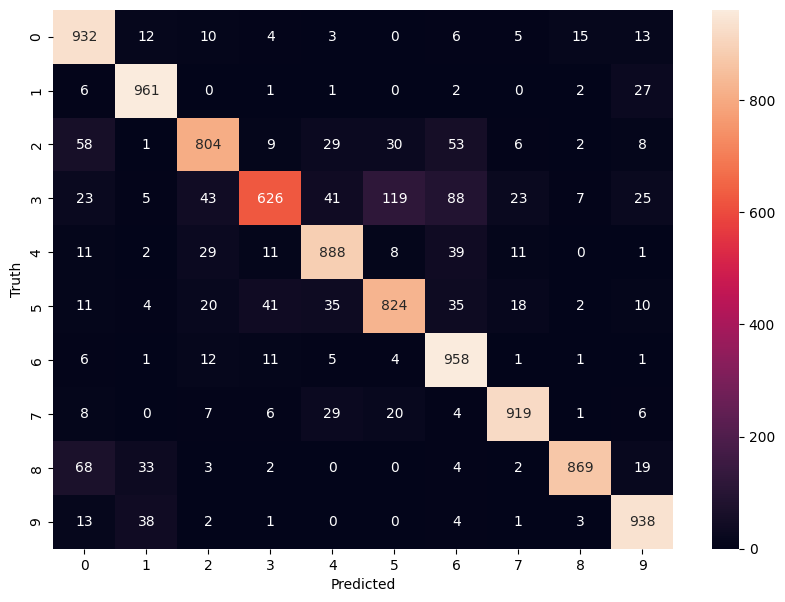

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cf,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

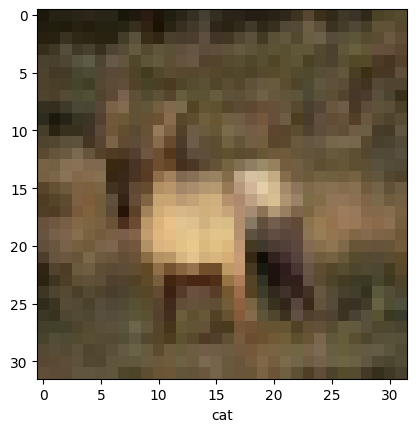

In [ ]:
plot_smple(x_train,y_train,3)

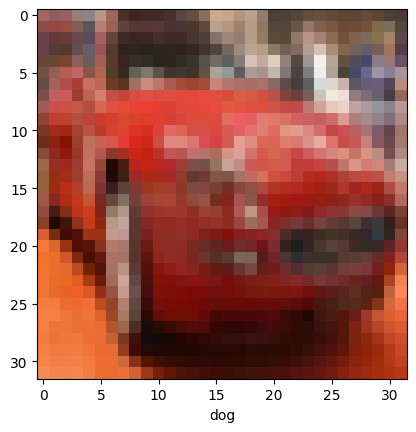

In [ ]:
plot_smple(x_train,y_train,5)

In [ ]:
# End